In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import clear_output
from IPython.display import display, Math, Markdown
import time 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing 

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat.python import lzip, lmap

from statsmodels.tools.data import _is_using_pandas, _is_recarray
from statsmodels.tools.validation import array_like
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import json
import pingouin as pg
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


In [5]:
# Pour le p7, liste des codes iso des pays pris comme référence

In [7]:
pays_refiso = pd.read_csv('pays_ref.csv')
pays_refiso.set_index(pays_refiso['iso3'], inplace=True)

In [8]:
pays_refiso

,iso3,region
iso3,,
CAN,CAN,nordic_european_countries_and_canada
DNK,DNK,nordic_european_countries_and_canada
FIN,FIN,nordic_european_countries_and_canada
ISL,ISL,nordic_european_countries_and_canada
NOR,NOR,nordic_european_countries_and_canada
...,...,...
YEM,YEM,asia
FJI,FJI,asia
IDN,IDN,asia


In [9]:
distrib_revenus = pd.read_csv('world_income_distribution_04-11.csv', decimal=",")
distrib_revenus

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


In [10]:
#gdpppp manquants pour Kosovo (XKX) Paléstine (PSE). 

In [11]:
def check_all_row_X(row, X_):
    row_val = row.values
    row_index = row.index
    for val, ind_ in zip(row_val,row_index) : 
        if val != X_:
            print("Not {} for country {} for field {} (count = {})".format(X_, row.name, ind_, val))
    return(-1)

In [12]:
distrib_revenus.groupby('country').count().apply(lambda row: check_all_row_X(row, 100), axis = 1)

Not 100 for country LTU for field year_survey (count = 99)
Not 100 for country LTU for field quantile (count = 99)
Not 100 for country LTU for field nb_quantiles (count = 99)
Not 100 for country LTU for field income (count = 99)
Not 100 for country LTU for field gdpppp (count = 99)
Not 100 for country PSE for field gdpppp (count = 0)
Not 100 for country XKX for field gdpppp (count = 0)


country
ALB   -1
ARG   -1
ARM   -1
AUT   -1
AZE   -1
      ..
VEN   -1
VNM   -1
XKX   -1
YEM   -1
ZAF   -1
Length: 116, dtype: int64

In [13]:
distrib_revenus.loc[distrib_revenus['country'] == 'XKX']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
5895,XKX,2008,96,100,5155.36470,NaN
5896,XKX,2008,97,100,5689.52930,NaN
5897,XKX,2008,98,100,6233.73930,NaN
5898,XKX,2008,99,100,7366.67700,NaN


In [14]:
distrib_revenus.loc[distrib_revenus['country'] == 'FJI']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,4300332.0
3201,FJI,2008,2,100,384.33230,4300332.0
3202,FJI,2008,3,100,436.59265,4300332.0
3203,FJI,2008,4,100,486.81436,4300332.0
3204,FJI,2008,5,100,520.19720,4300332.0
...,...,...,...,...,...,...
3295,FJI,2008,96,100,5481.08200,4300332.0
3296,FJI,2008,97,100,6205.61400,4300332.0
3297,FJI,2008,98,100,7265.12550,4300332.0
3298,FJI,2008,99,100,9553.19200,4300332.0


In [15]:
distrib_revenus.loc[distrib_revenus['country'] == 'FJI', 'gdpppp'] = 71109 #https://www.indexmundi.com/fiji/gdp_per_capita_(ppp).html

In [16]:
distrib_revenus.loc[distrib_revenus['country'] == 'PSE']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11199,PSE,2009,1,100,195.28990,NaN
11200,PSE,2009,2,100,264.36533,NaN
11201,PSE,2009,3,100,301.44672,NaN
11202,PSE,2009,4,100,329.83392,NaN
11203,PSE,2009,5,100,348.76495,NaN
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


In [17]:
distrib_revenus.loc[distrib_revenus['country'] == 'PSE', 'gdpppp'] = 6667  #https://www.indexmundi.com/facts/west-bank-and-gaza/gdp-per-capita

In [18]:
distrib_revenus.loc[distrib_revenus['country'] == 'XKX'] 

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
5895,XKX,2008,96,100,5155.36470,NaN
5896,XKX,2008,97,100,5689.52930,NaN
5897,XKX,2008,98,100,6233.73930,NaN
5898,XKX,2008,99,100,7366.67700,NaN


In [19]:
distrib_revenus.loc[distrib_revenus['country'] == 'XKX']

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
5895,XKX,2008,96,100,5155.36470,NaN
5896,XKX,2008,97,100,5689.52930,NaN
5897,XKX,2008,98,100,6233.73930,NaN
5898,XKX,2008,99,100,7366.67700,NaN


In [20]:
distrib_revenus.loc[distrib_revenus['country'] == 'XKX', 'gdpppp'] = 3255 

In [21]:
distrib_revenus.groupby('country').count().apply(lambda row: check_all_row_X(row, 100), axis = 1)

Not 100 for country LTU for field year_survey (count = 99)
Not 100 for country LTU for field quantile (count = 99)
Not 100 for country LTU for field nb_quantiles (count = 99)
Not 100 for country LTU for field income (count = 99)
Not 100 for country LTU for field gdpppp (count = 99)


country
ALB   -1
ARG   -1
ARM   -1
AUT   -1
AZE   -1
      ..
VEN   -1
VNM   -1
XKX   -1
YEM   -1
ZAF   -1
Length: 116, dtype: int64

In [22]:
#Pour les quantiles manquants

In [23]:
country_nb_quantiles = distrib_revenus[['country', 'quantile']].groupby('country').count()
country_nb_quantiles

,quantile
country,
ALB,100
ARG,100
ARM,100
AUT,100
AZE,100
...,...
VEN,100
VNM,100
XKX,100


In [24]:

country_nb_quantiles[country_nb_quantiles['quantile'] != 100]

,quantile
country,
LTU,99


In [25]:
ltu_quantiles = distrib_revenus.loc[distrib_revenus['country'] == 'LTU', 'quantile'].values

In [26]:
for i in range(1,101):
    if i not in ltu_quantiles: print(i)

41


In [27]:
distrib_revenus.loc[(distrib_revenus['country'] == 'LTU') & (distrib_revenus['quantile'].isin([40,42]))]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0


In [28]:
#Il manque le quantile 41 de la Lithuanie- on le remplace en faisant la moyenne quantile 40 ET 42

In [29]:
q40_income = distrib_revenus.loc[
        (distrib_revenus['country'] == 'LTU') & 
        (distrib_revenus['quantile'] == 40), 'income'
    ].values[0]

q42_income = distrib_revenus.loc[
        (distrib_revenus['country'] == 'LTU') & 
        (distrib_revenus['quantile'] == 42), 'income'
    ].values[0]

In [30]:
distrib_revenus.loc['6239a'] = ['LTU', 2008, 41, 100, (q40_income + q42_income) / 2, 17571.0]

In [32]:
#Création un dataframe séparé spécial GDP PPP

In [33]:
distrib_revenus[['country', 'gdpppp']].drop_duplicates()

,country,gdpppp
0,ALB,7297.00000
100,ARG,13220.00000
200,ARM,5611.00000
300,AUT,36193.00000
400,AZE,8101.00000
...,...,...
11099,VNM,2578.00000
11199,PSE,6667.00000
11299,YEM,2224.00000
11399,ZAF,9602.00000


In [34]:
gdp_ppp = distrib_revenus[['country', 'gdpppp']].drop_duplicates()
gdp_ppp.set_index('country', inplace=True)

In [35]:
gdp_ppp.head()

,gdpppp
country,
ALB,7297.0
ARG,13220.0
ARM,5611.0
AUT,36193.0
AZE,8101.0


In [36]:
gdp_ppp.tail()

,gdpppp
country,
VNM,2578.00000
PSE,6667.00000
YEM,2224.00000
ZAF,9602.00000
COD,303.19305


In [37]:
#Indice de Gini

In [38]:
indice_gini = pd.read_csv('indice_gini_60-17.csv')
indice_gini = indice_gini.set_index('Country Code')

In [39]:
indice_gini

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,Angola,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,Albania,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.8,33.3,27.8,29.0,26.3,27.3,26.4,26.5,NaN,NaN
YEM,"Yemen, Rep.",GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN
ZAF,South Africa,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN


In [40]:

indice_gini = indice_gini[[ str(x) for x in range(1960, 2017) ]]
indice_gini

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.4,26.5
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN


In [41]:
def check_if_all_na(serie_):
    vals = serie_.values
    vals_non_na = [item for item in vals if not np.isnan(item)]
    if len(vals_non_na) == 0: 
        print("All n.a for {}".format(serie_.name))
    return(len(vals_non_na))
    

In [42]:
indice_gini.apply(check_if_all_na, axis = 1)

All n.a for ABW
All n.a for AFG
All n.a for AND
All n.a for ARB
All n.a for ARE
All n.a for ASM
All n.a for ATG
All n.a for BHR
All n.a for BHS
All n.a for BMU
All n.a for BRB
All n.a for BRN
All n.a for CEB
All n.a for CHI
All n.a for CSS
All n.a for CUB
All n.a for CUW
All n.a for CYM
All n.a for DMA
All n.a for EAP
All n.a for EAR
All n.a for EAS
All n.a for ECA
All n.a for ECS
All n.a for EMU
All n.a for ERI
All n.a for EUU
All n.a for FCS
All n.a for FRO
All n.a for GIB
All n.a for GNQ
All n.a for GRD
All n.a for GRL
All n.a for GUM
All n.a for HIC
All n.a for HKG
All n.a for HPC
All n.a for IBD
All n.a for IBT
All n.a for IDA
All n.a for IDB
All n.a for IDX
All n.a for IMN
All n.a for INX
All n.a for KHM
All n.a for KNA
All n.a for KWT
All n.a for LAC
All n.a for LBY
All n.a for LCN
All n.a for LDC
All n.a for LIC
All n.a for LIE
All n.a for LMC
All n.a for LMY
All n.a for LTE
All n.a for MAC
All n.a for MAF
All n.a for MCO
All n.a for MEA
All n.a for MHL
All n.a for MIC
All n.a 

Country Code
ABW     0
AFG     0
AGO     2
ALB     5
AND     0
       ..
XKX    11
YEM     3
ZAF     7
ZMB     9
ZWE     1
Length: 264, dtype: int64

In [43]:
indice_gini.apply(check_if_all_na, axis = 0)

All n.a for 1960
All n.a for 1961
All n.a for 1962
All n.a for 1963
All n.a for 1964
All n.a for 1965
All n.a for 1966
All n.a for 1967
All n.a for 1968
All n.a for 1969
All n.a for 1970
All n.a for 1971
All n.a for 1972
All n.a for 1973
All n.a for 1974
All n.a for 1975
All n.a for 1976
All n.a for 1977
All n.a for 1978


1960     0
1961     0
1962     0
1963     0
1964     0
1965     0
1966     0
1967     0
1968     0
1969     0
1970     0
1971     0
1972     0
1973     0
1974     0
1975     0
1976     0
1977     0
1978     0
1979     3
1980     2
1981     7
1982     1
1983     2
1984     5
1985     8
1986    11
1987    13
1988     9
1989    13
1990    14
1991    14
1992    26
1993    21
1994    22
1995    24
1996    28
1997    22
1998    35
1999    26
2000    32
2001    33
2002    43
2003    52
2004    67
2005    71
2006    71
2007    70
2008    70
2009    73
2010    81
2011    74
2012    75
2013    72
2014    70
2015    66
2016    28
dtype: int64

In [44]:
## 46. 

indice_gini = indice_gini.dropna(how='all')
indice_gini = indice_gini.dropna(axis=1, how='all')
indice_gini

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
ARG,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,...,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5
AUS,NaN,NaN,31.3,NaN,NaN,NaN,32.5,NaN,NaN,NaN,...,NaN,35.4,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.8,33.3,27.8,29.0,26.3,27.3,26.4,26.5
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.7,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.0,NaN,63.4,NaN,NaN,NaN,63.0,NaN,NaN


In [45]:
indice_gini.apply(check_if_all_na, axis = 1)

Country Code
AGO     2
ALB     5
ARG    28
ARM    17
AUS     8
       ..
XKX    11
YEM     3
ZAF     7
ZMB     9
ZWE     1
Length: 161, dtype: int64

In [46]:
indice_gini.apply(check_if_all_na, axis = 0)

1979     3
1980     2
1981     7
1982     1
1983     2
1984     5
1985     8
1986    11
1987    13
1988     9
1989    13
1990    14
1991    14
1992    26
1993    21
1994    22
1995    24
1996    28
1997    22
1998    35
1999    26
2000    32
2001    33
2002    43
2003    52
2004    67
2005    71
2006    71
2007    70
2008    70
2009    73
2010    81
2011    74
2012    75
2013    72
2014    70
2015    66
2016    28
dtype: int64

In [47]:
#Pays manquants  - Ajout manuel pour indice gini manquants

In [48]:
## 49.
refiso = ~np.isin(pays_refiso['iso3'].values, indice_gini.index.values) 
pays_refiso.loc[refiso, 'iso3']

iso3
POL    POL
SRB    SRB
KHM    KHM
TWN    TWN
PHL    PHL
Name: iso3, dtype: object

In [49]:
refiso

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False])

In [50]:
indice_gini.loc['POL'] = np.nan
gini_pol = {'1992':26.70, '2005':35.86, '2015':31.82}
for annee in gini_pol:
    indice_gini.loc['POL', annee] = gini_pol[annee]
gini_pol

{'1992': 26.7, '2005': 35.86, '2015': 31.82}

In [51]:
indice_gini.loc['SRB'] = np.nan
gini_srb = {'1992':43.82, '2003':44.04, '2012':43.04}
for annee in gini_srb:
     indice_gini.loc['SRB', annee] = gini_srb[annee]

In [52]:
indice_gini.loc['KHM'] = np.nan
gini_khm = {'1994':38.15, '2004':35.46, '2012':30.76}
for annee in gini_khm:
     indice_gini.loc['KHM', annee] = gini_khm[annee]

In [53]:

indice_gini.loc['TWN'] = np.nan
gini_twn = {'1995':31.8, '2005':34, '2010':34.1}
for annee in gini_twn:
     indice_gini.loc['TWN', annee] = gini_twn[annee]

In [54]:
indice_gini.loc['PHL'] = np.nan
gini_phl = {'1994':38.52, '2003':44.04, '2012':43.04}
for annee in gini_phl:
     indice_gini.loc['PHL', annee] = gini_phl[annee]

In [55]:
## 58.
refiso = ~np.isin(pays_refiso['iso3'].values, indice_gini.index.values) # Pays à l'intérieur de pays_ref mais absent de indice_gini.
pays_refiso.loc[refiso, 'iso3']

Series([], Name: iso3, dtype: object)

In [56]:
#indice gini de reference
#calcul, pour chaque pays, la moyenne des indices de Gini sur la + petite période qui contient au moins 1 indice de Gini par pays.

In [57]:
## 59

nb_pays_sans_ginis = lambda annees: (indice_gini.loc[:,annees].notna().sum(axis=1) == 0).sum()


plus_petit_intervalle_taille = 1000 
plus_petit_intervalle = None

for annee_d in range(1979,2017):
    for annee_f in range(annee_d+1, 2017):
        annees = [str(x) for x in range(annee_d, annee_f)]
        # si on trouve un intervalle meilleur, on le garde
        if nb_pays_sans_ginis(annees) == 0 and len(annees) < plus_petit_intervalle_taille:
            plus_petit_intervalle_taille = len(annees)
            plus_petit_intervalle = annees

In [58]:
indice_gini_ref = pd.DataFrame(indice_gini[plus_petit_intervalle].sum(axis=1) / indice_gini[plus_petit_intervalle].notna().sum(axis=1),
                               columns=['gini_ref'])

In [59]:
## 65
indice_gini_ref

,gini_ref
Country Code,
AGO,47.350000
ALB,29.660000
ARG,46.930435
ARM,32.156250
AUS,33.940000
...,...
POL,31.460000
SRB,43.633333
KHM,34.790000


In [60]:
population = pd.read_csv('population_60-17.csv')
population = population.set_index('Country Code')
population

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
AFG,Afghanistan,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
AGO,Angola,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
ALB,Albania,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
AND,Andorra,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
YEM,"Yemen, Rep.","Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
ZAF,South Africa,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN


In [61]:

population = population[[ str(x) for x in range(1960, 2017) ]]

In [62]:

population = population.dropna(how='all')
population = population.dropna(axis=1, how='all')

In [63]:
#population de reference On prend 2011 -(récente et contient la population de tout les pays)

In [64]:
population_ref = population[['2011']]
population_ref.columns = ['population']

In [65]:
population_ref.head(2)

,population
Country Code,
ABW,102053.0
AFG,29708599.0


In [ ]:
#Coeff elasticité 

In [67]:
elasticite_pays = pd.read_csv('elasticite_pays.csv')
elasticite_pays = elasticite_pays[['iso3', 'IGEincome']].drop_duplicates().dropna()

elasticite_region = pd.read_csv('elasticite_regions.csv', decimal=',')


In [68]:
elasticite_pays

,iso3,IGEincome
60,ALB,0.815874
183,AUS,0.275000
243,AUT,0.245267
351,BEL,0.183176
405,BEN,0.855116
...,...,...
6202,USA,0.537666
6274,UZB,0.496764
6330,VNM,0.480000
6426,ZAF,0.677000


In [69]:
elasticite_region

,region,elasticite
0,nordic_european_countries_and_canada,0.20
1,europe_except_nordic_countries,0.40
2,australia_new_zealand_usa,0.40
3,asia,0.50
4,latin_america_africa,0.66


In [70]:

elasticite_pays.shape

(75, 2)

In [71]:
## 76
coef_elasticite = pays_refiso.merge(elasticite_region, how='left', on='region')


for row in elasticite_pays.iterrows():
    iso = row[1][0]
    elasticite = row[1][1]
    
    if iso in coef_elasticite.iso3.values:
        coef_elasticite.loc[coef_elasticite.iso3 == iso, 'elasticite'] = elasticite

In [72]:
pays_refiso

,iso3,region
iso3,,
CAN,CAN,nordic_european_countries_and_canada
DNK,DNK,nordic_european_countries_and_canada
FIN,FIN,nordic_european_countries_and_canada
ISL,ISL,nordic_european_countries_and_canada
NOR,NOR,nordic_european_countries_and_canada
...,...,...
YEM,YEM,asia
FJI,FJI,asia
IDN,IDN,asia


In [73]:

coef_elasticite = coef_elasticite[['iso3', 'elasticite']]
coef_elasticite.set_index('iso3', inplace=True)

In [74]:
coef_elasticite

,elasticite
iso3,
CAN,0.269333
DNK,0.145146
FIN,0.112876
ISL,0.200000
NOR,0.198667
...,...
YEM,0.500000
FJI,0.500000
IDN,0.500000


In [75]:
coef_elasticite.loc['FRA']

elasticite    0.357105
Name: FRA, dtype: float64

# Mission1

Resumé des données

In [76]:
distrib_revenus_annees = np.sort(distrib_revenus['year_survey'].unique())
indice_gini_annees = indice_gini.columns.values
population_annees = population.columns.values

In [77]:

print('Distribution des revenus : ')
for annee in distrib_revenus_annees:
    print(annee, end=', ')

print('\n\nIndice de Gini : ')
for annee in indice_gini_annees:
    print(annee, end=', ')

print('\n\nPopulation :')
for annee in population_annees:
    print(annee, end=', ')

Distribution des revenus : 
2004, 2006, 2007, 2008, 2009, 2010, 2011, 

Indice de Gini : 
1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 

Population :
1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 

In [78]:

distrib_revenus_pays = distrib_revenus.country.unique()
indice_gini_pays = indice_gini.index.values
population_pays = population.index.values

In [79]:

print(f"""
Distribution des revenus  { len(distrib_revenus_pays) } pays
Indice de Gini            { len(indice_gini_pays) } pays
Population                { len(population_pays) } pays et régions
""")


Distribution des revenus  116 pays
Indice de Gini            166 pays
Population                263 pays et régions



In [80]:
distrib_revenus_pays

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

In [81]:
## 77.

pays = np.intersect1d(distrib_revenus_pays, indice_gini_pays)

In [82]:
pays

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK',
       'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR',
       'GEO', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN',
       'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'PSE', 'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE',
       'SWZ', 'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA',
       'UKR', 'URY', 'USA', 'VEN', 'VNM', 'XKX', 'YEM', 'ZAF'],
      dtype=object)

In [83]:

np.isin(pays, population.index).any()

True

In [84]:
population

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
YEM,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,5858638.0,5971407.0,6083619.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
ZAF,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,21045785.0,21622590.0,22219897.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0


In [85]:
#Calcul de population totale des ces pays et recuperation de la population mondiale
pop_couverte_11 = population[population.index.map(lambda x: x in pays)]['2011'].sum() 
pop_monde_11 = population_ref.loc['WLD'].values[0]

In [86]:
pop_couverte_11 

6397304454.0

In [87]:
pop_monde_11

7014983968.0

In [88]:
print(f"{pop_couverte_11 / pop_monde_11 * 100:.0f}% de la population est recuperee")

91% de la population est recuperee


In [89]:
# Quels sont les quantiles présents ?
distrib_revenus.nb_quantiles.unique()

array([100], dtype=int64)

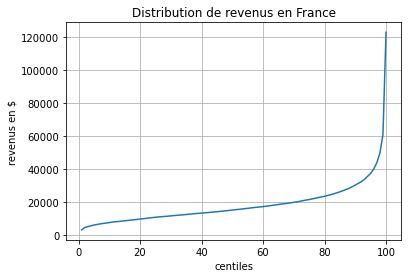

In [90]:
## 96.
df = distrib_revenus.loc[distrib_revenus.country == 'FRA', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'])
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

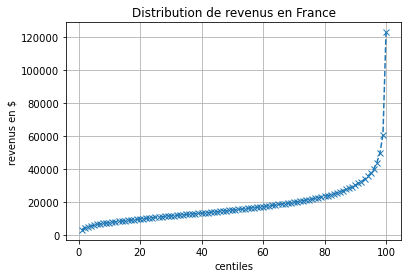

In [91]:
## 96 bis.
df = distrib_revenus.loc[distrib_revenus.country == 'FRA', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'],'x--')
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

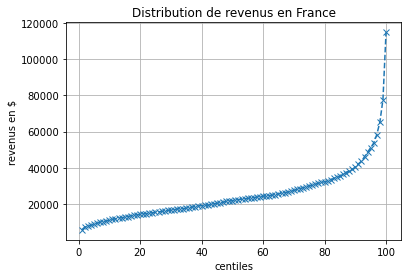

In [92]:
df = distrib_revenus.loc[distrib_revenus.country == 'LUX', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'],'x--')
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

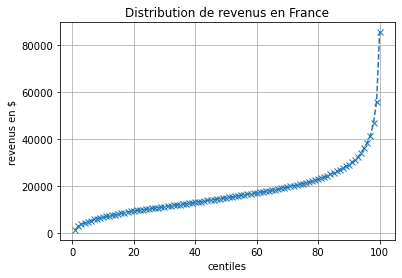

In [93]:
df = distrib_revenus.loc[distrib_revenus.country == 'JPN', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'],'x--')
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

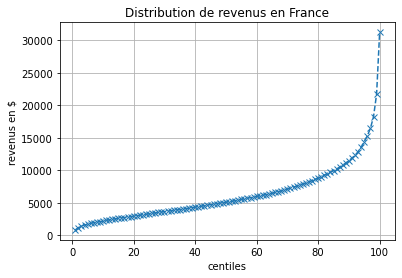

In [94]:
df = distrib_revenus.loc[distrib_revenus.country == 'BIH', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'],'x--')
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

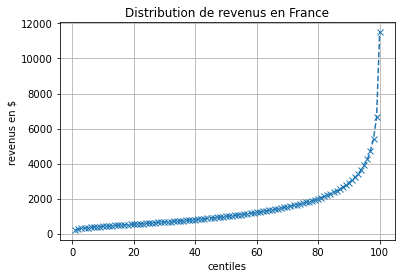

In [95]:
df = distrib_revenus.loc[distrib_revenus.country == 'PHL', ['income', 'quantile']]
plt.plot(df['quantile'], df['income'],'x--')
plt.title('Distribution de revenus en France')
plt.xlabel('centiles')
plt.ylabel('revenus en $')
plt.grid()
plt.show()

# Mission2

In [96]:

pays_info = indice_gini_ref.merge(gdp_ppp, left_index=True, right_index=True)
pays_info

,gini_ref,gdpppp
ALB,29.660000,7297.0
ARG,46.930435,13220.0
ARM,32.156250,5611.0
AUT,30.269231,36193.0
AZE,23.366667,8101.0
...,...,...
POL,31.460000,16436.0
SRB,43.633333,10234.0
KHM,34.790000,1802.0
TWN,33.300000,25342.0


In [97]:
pays_info.to_csv('paysinfo.csv', index = False)

In [98]:
distrib_revenus.to_csv('distrevfinal.csv', index = False)

In [99]:
pays_refiso.to_csv('paysref.csv', index = False)

In [100]:
indice_gini.to_csv('indicegini.csv', index = False)

In [101]:
distrib_revenus

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305
11598,COD,2008,100,100,2243.12260,303.19305


In [102]:
pays_info

,gini_ref,gdpppp
ALB,29.660000,7297.0
ARG,46.930435,13220.0
ARM,32.156250,5611.0
AUT,30.269231,36193.0
AZE,23.366667,8101.0
...,...,...
POL,31.460000,16436.0
SRB,43.633333,10234.0
KHM,34.790000,1802.0
TWN,33.300000,25342.0


In [103]:
nb_cluster = 5


pays_info_norm = preprocessing.scale(pays_info)

km = KMeans(n_clusters = nb_cluster).fit(pays_info_norm)

i_pays_plus_proches, _ = pairwise_distances_argmin_min(km.cluster_centers_, pays_info_norm)

In [104]:
km.labels_

array([4, 2, 4, 1, 4, 1, 0, 4, 4, 4, 4, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       2, 1, 1, 1, 1, 2, 2, 4, 1, 4, 1, 3, 1, 1, 0, 0, 0, 1, 2, 2, 4, 4,
       0, 4, 1, 0, 4, 1, 1, 1, 4, 1, 4, 0, 4, 4, 4, 4, 0, 4, 3, 4, 0, 4,
       0, 2, 0, 0, 4, 4, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 4, 2, 2, 1, 2, 4,
       4, 0, 4, 2, 1, 1, 1, 2, 4, 0, 4, 4, 0, 0, 0, 4, 0, 1, 2, 4, 4, 4,
       2, 4, 0, 4, 1, 0])

In [105]:
pays_info_with_labels =  pays_info.copy()
pays_info_with_labels['label'] = km.labels_


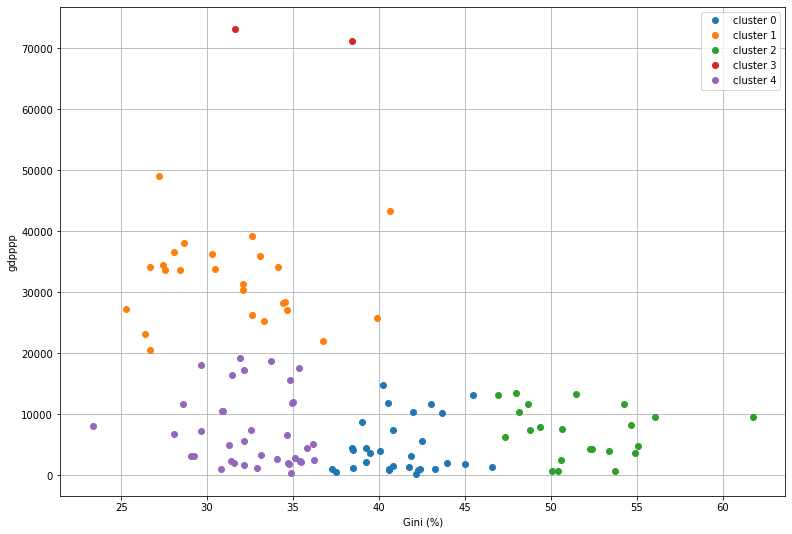

In [106]:

plt.figure(figsize=(13,9))
for i in range(nb_cluster):
    loc_pays_info_with_labels = pays_info_with_labels[pays_info_with_labels['label'] == i].copy()
    plt.plot(loc_pays_info_with_labels['gini_ref'],loc_pays_info_with_labels['gdpppp'],'o',label = 'cluster '+str(i))
plt.grid()
plt.legend()
plt.xlabel('Gini (%)')
plt.ylabel('gdpppp')
plt.show()
    
    




In [107]:
pays_info.loc['FJI']

gini_ref       38.4
gdpppp      71109.0
Name: FJI, dtype: float64

In [108]:
pays_info_with_labels[pays_info_with_labels['label'] == 1 ]

,gini_ref,gdpppp,label
AUT,30.269231,36193.0,1
BEL,28.430769,33561.0,1
CAN,33.062500,35895.0,1
CYP,32.616667,26273.0,1
CZE,26.385714,23223.0,1
DEU,30.480000,33758.0,1
DNK,26.700000,34130.0,1
ESP,34.538462,28336.0,1
FIN,27.561538,33626.0,1
FRA,32.092308,30357.0,1


In [109]:
## 106
i_pays_plus_proches, _

(array([115,  53,  28,  62,   9], dtype=int32),
 array([0.12241146, 0.09971126, 0.13999985, 0.41929113, 0.01127063]))

In [110]:
pays_representatifs_cluster = pays_info_with_labels.iloc[i_pays_plus_proches].sort_values('gdpppp', ascending=False)
pays_representatifs_cluster

,gini_ref,gdpppp,label
LUX,31.607692,73127.0,3
JPN,32.100000,31307.0,1
ECU,50.629412,7560.0,2
BIH,32.560000,7472.0,4
PHL,41.866667,3240.0,0


In [111]:
codes_pays_representatifs = pays_representatifs_cluster.index.values
# pays = ['FRA', 'VNM', 'GHA', 'CZE']
codes_pays_representatifs

array(['LUX', 'JPN', 'ECU', 'BIH', 'PHL'], dtype=object)

In [112]:
#200.
distrib_revenus

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305
11598,COD,2008,100,100,2243.12260,303.19305


# Courbe de LORENZ

In [113]:
X = distrib_revenus.loc[distrib_revenus.country == 'LUX', ['income']]
X1 = X['income']
X2 = X1.tolist()


In [114]:
sorted_X = X2.copy()
sorted_X.sort()
sorted_cumsum_X = np.cumsum(sorted_X)
sorted_cumsum_X
sum_X = np.sum(X)

In [115]:
X_lorenz = [item / sum_X for item in sorted_cumsum_X]
X_lorenz

[income    0.002292
 dtype: float64,
 income    0.005193
 dtype: float64,
 income    0.008323
 dtype: float64,
 income    0.011619
 dtype: float64,
 income    0.015166
 dtype: float64,
 income    0.018943
 dtype: float64,
 income    0.022927
 dtype: float64,
 income    0.027028
 dtype: float64,
 income    0.031292
 dtype: float64,
 income    0.035753
 dtype: float64,
 income    0.040334
 dtype: float64,
 income    0.045051
 dtype: float64,
 income    0.049919
 dtype: float64,
 income    0.054879
 dtype: float64,
 income    0.059958
 dtype: float64,
 income    0.065168
 dtype: float64,
 income    0.070565
 dtype: float64,
 income    0.076089
 dtype: float64,
 income    0.081709
 dtype: float64,
 income    0.087385
 dtype: float64,
 income    0.093157
 dtype: float64,
 income    0.099017
 dtype: float64,
 income    0.104981
 dtype: float64,
 income    0.111018
 dtype: float64,
 income    0.117153
 dtype: float64,
 income    0.123402
 dtype: float64,
 income    0.129728
 dtype: float64,
 

In [116]:
X_lorenz = [0] + X_lorenz

In [117]:
x_axis = [i for i in range(len(X_lorenz))]

In [118]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [119]:
gini(np.array(X))

array([0.29293516])

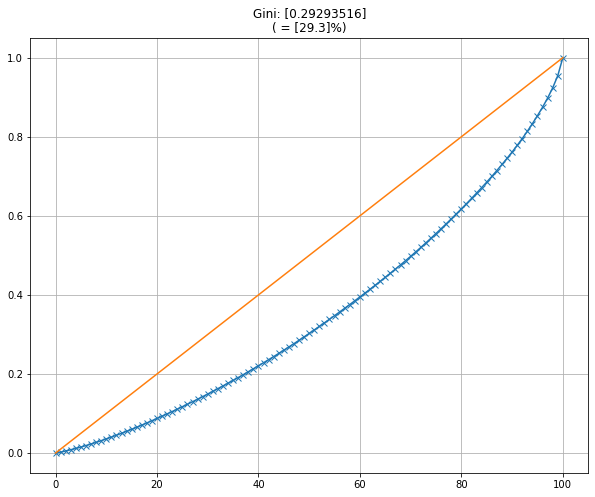

In [120]:
plt.figure(figsize = (10,8)) 
plt.plot(x_axis, X_lorenz,'-x')
plt.plot(x_axis, [item / (len(x_axis) - 1) for item in x_axis])
gini_ = gini(np.array(X))
gini_percentage_ = 100 * gini_
plt.title('Gini: {}\n( = {}%)'.format(gini_, np.round(gini_percentage_, 1)))
plt.grid()
plt.show()

In [121]:
X = distrib_revenus.loc[distrib_revenus.country == 'JPN', ['income']]
X1 = X['income']
X2 = X1.tolist()


In [122]:
sorted_X = X2.copy()
sorted_X.sort()
sorted_cumsum_X = np.cumsum(sorted_X)
sorted_cumsum_X
sum_X = np.sum(X)

In [123]:
X_lorenz = [item / sum_X for item in sorted_cumsum_X]
X_lorenz

[income    0.000702
 dtype: float64,
 income    0.002307
 dtype: float64,
 income    0.004423
 dtype: float64,
 income    0.006832
 dtype: float64,
 income    0.009544
 dtype: float64,
 income    0.012485
 dtype: float64,
 income    0.015744
 dtype: float64,
 income    0.019239
 dtype: float64,
 income    0.022942
 dtype: float64,
 income    0.026815
 dtype: float64,
 income    0.030805
 dtype: float64,
 income    0.034962
 dtype: float64,
 income    0.039271
 dtype: float64,
 income    0.04371
 dtype: float64,
 income    0.048297
 dtype: float64,
 income    0.053076
 dtype: float64,
 income    0.058034
 dtype: float64,
 income    0.063127
 dtype: float64,
 income    0.068352
 dtype: float64,
 income    0.07369
 dtype: float64,
 income    0.079153
 dtype: float64,
 income    0.084726
 dtype: float64,
 income    0.090374
 dtype: float64,
 income    0.096121
 dtype: float64,
 income    0.101981
 dtype: float64,
 income    0.107938
 dtype: float64,
 income    0.113992
 dtype: float64,
 in

In [124]:
X_lorenz = [0] + X_lorenz

In [125]:
x_axis = [i for i in range(len(X_lorenz))]

In [126]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [127]:
gini(np.array(X))

array([0.32109065])

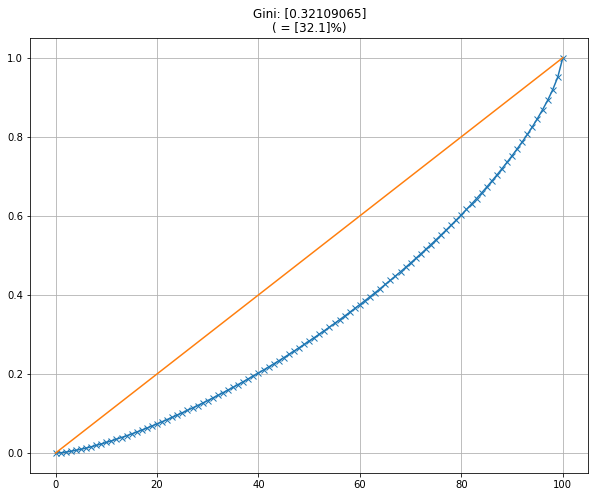

In [128]:
plt.figure(figsize = (10,8)) 
plt.plot(x_axis, X_lorenz,'-x')
plt.plot(x_axis, [item / (len(x_axis) - 1) for item in x_axis])
gini_ = gini(np.array(X))
gini_percentage_ = 100 * gini_
plt.title('Gini: {}\n( = {}%)'.format(gini_, np.round(gini_percentage_, 1)))
plt.grid()
plt.show()

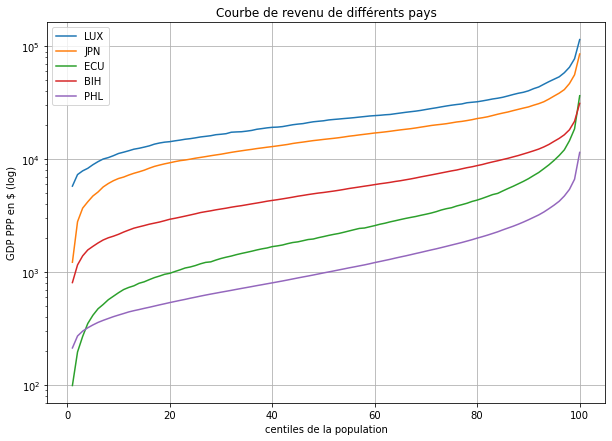

In [129]:

fig = plt.figure(figsize=(10,7))
ax = plt.gca()

for code_pays in codes_pays_representatifs:
        ax.plot(
            range(1,101), 
            distrib_revenus.loc[distrib_revenus.country == code_pays, 'income'],
            label=code_pays)
    

ax.set_yscale('log')


plt.legend(loc='upper left')
plt.grid(True)


plt.title('Courbe de revenu de différents pays')
plt.xlabel('centiles de la population')
plt.ylabel('GDP PPP en $ (log)')
plt.show()

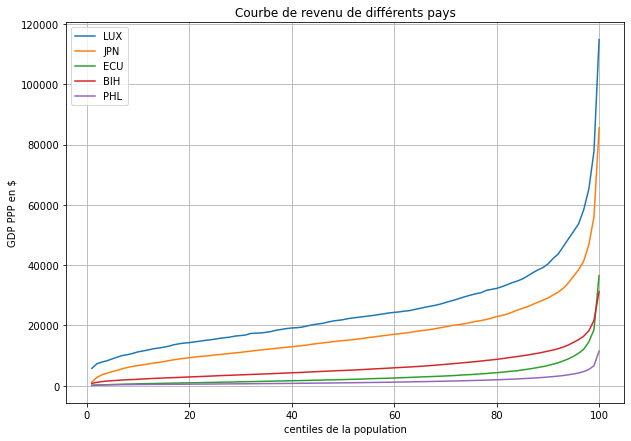

In [130]:

fig = plt.figure(figsize=(10,7))
ax = plt.gca()

for code_pays in codes_pays_representatifs:
        ax.plot(
            range(1,101), 
            distrib_revenus.loc[distrib_revenus.country == code_pays, 'income'],
            label=code_pays)

plt.legend(loc='upper left')
plt.grid(True)


plt.title('Courbe de revenu de différents pays')
plt.xlabel('centiles de la population')
plt.ylabel('GDP PPP en $')
plt.show()

In [131]:
pays_refiso.head(10)

,iso3,region
iso3,,
CAN,CAN,nordic_european_countries_and_canada
DNK,DNK,nordic_european_countries_and_canada
FIN,FIN,nordic_european_countries_and_canada
ISL,ISL,nordic_european_countries_and_canada
NOR,NOR,nordic_european_countries_and_canada
SWE,SWE,nordic_european_countries_and_canada
ALB,ALB,europe_except_nordic_countries
AUT,AUT,europe_except_nordic_countries
BEL,BEL,europe_except_nordic_countries


Text(0, 0.5, 'Indice de Gini')

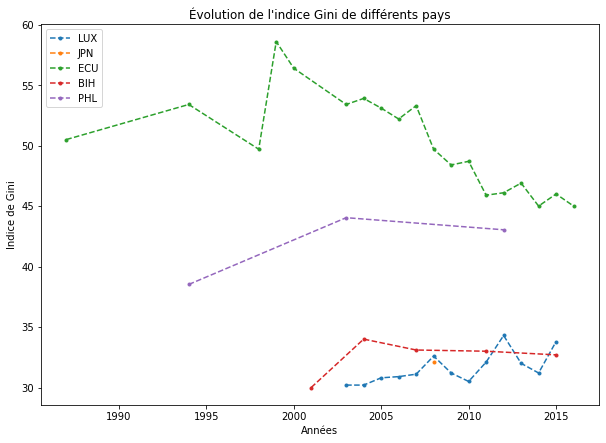

In [132]:

plt.figure(figsize=(10,7))

for code_pays in codes_pays_representatifs:
    
    s = indice_gini.loc[code_pays, :].dropna()
    values = s.values
    years = s.index.values.astype(int)
    
    plt.plot(years, values, '.--', label=code_pays)


plt.legend(loc='upper left')
plt.title("Évolution de l'indice Gini de différents pays")
plt.xlabel('Années')
plt.ylabel('Indice de Gini')

In [133]:


indice_gini_rank = indice_gini_ref.copy()
indice_gini_rank['rank'] = indice_gini_rank['gini_ref'].rank(ascending=True)

Les 5 pays avec le plus fort indice de Gini :

In [134]:
indice_gini_rank[indice_gini_rank['rank'] >= len(indice_gini_rank)-4].sort_values('rank', ascending=False)

,gini_ref,rank
Country Code,,
BWA,62.000000,166.0
ZAF,61.714286,165.0
NAM,61.133333,164.0
BLZ,57.733333,163.0
SUR,57.600000,162.0


Les 5 pays avec le plus faible indice de Gini :

In [135]:
indice_gini_rank[indice_gini_rank['rank'] <= 5].sort_values('rank')

,gini_ref,rank
Country Code,,
AZE,23.366667,1.0
SVN,25.276923,2.0
CZE,26.385714,3.0
SVK,26.653846,4.0
DNK,26.700000,5.0


In [136]:
indice_gini_rank[indice_gini_rank['rank'] <= 5].sort_values('rank')

,gini_ref,rank
Country Code,,
AZE,23.366667,1.0
SVN,25.276923,2.0
CZE,26.385714,3.0
SVK,26.653846,4.0
DNK,26.700000,5.0


In [137]:
fr_gini = indice_gini_rank.loc['FRA', 'gini_ref']
fr_gini_rank = indice_gini_rank.loc['FRA', 'rank']
fr_gini

32.09230769230769

In [138]:
alb_gini = indice_gini_rank.loc['ALB', 'gini_ref']
alb_gini_rank = indice_gini_rank.loc['ALB', 'rank']
alb_gini

29.660000000000004

In [139]:
mex_gini = indice_gini_rank.loc['MEX', 'gini_ref']

mex_gini

47.93846153846154

In [140]:

print(f"""
La France a un indice Gini de {fr_gini:.2f} (moyenne sur les années 2003-2015).
c'est le {fr_gini_rank:.0f}eme pays avec le plus faible indice.
""")


La France a un indice Gini de 32.09 (moyenne sur les années 2003-2015).
c'est le 33eme pays avec le plus faible indice.



In [143]:
pays_info

,gini_ref,gdpppp
ALB,29.660000,7297.0
ARG,46.930435,13220.0
ARM,32.156250,5611.0
AUT,30.269231,36193.0
AZE,23.366667,8101.0
...,...,...
POL,31.460000,16436.0
SRB,43.633333,10234.0
KHM,34.790000,1802.0
TWN,33.300000,25342.0


In [144]:
indice_gini

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,29.00,NaN,NaN,NaN,NaN
ARG,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,...,46.3,44.5,43.9,43.0,42.3,41.20,41.0,41.4,NaN,42.4
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.2,29.2,28.0,30.0,29.4,29.60,30.6,31.5,32.40,32.5
AUS,NaN,NaN,31.3,NaN,NaN,NaN,32.5,NaN,NaN,NaN,...,NaN,35.4,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.82,NaN
SRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43.04,NaN,NaN,NaN,NaN
KHM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.76,NaN,NaN,NaN,NaN


In [145]:
pays_refiso

,iso3,region
iso3,,
CAN,CAN,nordic_european_countries_and_canada
DNK,DNK,nordic_european_countries_and_canada
FIN,FIN,nordic_european_countries_and_canada
ISL,ISL,nordic_european_countries_and_canada
NOR,NOR,nordic_european_countries_and_canada
...,...,...
YEM,YEM,asia
FJI,FJI,asia
IDN,IDN,asia


# Mission3



Générez un grand nombre $n$ de réalisations d'une variable que nous appellerons $ln(Y_{parent})$ selon une loi normale. Le choix de la moyenne et de l'écart-type n'auront pas d'incidence sur le résultat final. $n$ doit être supérieur à 1000 fois le nombre de quantiles.

Générez $n$ réalisations du terme d'erreur $\epsilon$ selon une loi normale de moyenne 0 et d'écart-type 1.

Pour une valeur donnée de $p_j$ (par exemple 0.9), calculez $y_{child} = e^{\alpha+p_jln(y_{parent})+\epsilon}$ . Le choix de $ \alpha$ n'a aucune incidence sur le résultat final et peut être supprimé. A ce stade, $y_{child}$ contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.




# Exemple de la fonction ci-dessous. 
n = 3 (nombre de famille.  1 famille: 1 parent + enfant).

pj = 0,9. (Coefficient d'élasticité). Ce que ça veut dire, c'est si le revenu des parents augmente de 1, en moyenne le revenu des enfants va augmenter de 0,9. Attention: c'est en moyenne, ca ne veut pas que si le revenu d'une personne augmente alors le revenu de son enfant de 0.9. 

alpha = 0. 

Coefficient d'élasticité: Variation en moyenne d'une variable par rapport à une autre. 
Par exemple: Le coefficent d'élasticité entre prix d'une voiture neuve et les ventes de voitures neuves sur le court-terme: assez fort. Si le prix augmente de 1% -> Vente diminue de 3%. 

Autre exemple: Le prix de l'essence et la consommation d'essence. Elasticité assez faible sur le court-terme. Si le prix augmente de 1% -> Vente diminue de 0.5%. 

Famille 1:
- Revenu parents. exp(loi normale). ln_rev_par = 0.69 (tirage aléatoire) -> rev_par = exp(0.69) = 1.99 
- Terme d'erreur: loi normal. epsilon = 0.61 (tirage aléatoire)
- Revenu de enfant: exp ( pj * ln_rev_par + epsilon) = exp( 0.9 * 0.69 + 0.61) = 3.42

Famille 2: 
- Revenu parents. exp(loi normale). ln_rev_par = -1.10 -> rev_par = exp(-1.10) = 0.33
- Terme d'erreur: loi normal. epsilon = -1.45
- Revenu de enfant: exp ( pj * ln_rev_par + epsilon) = exp( 0.9 * -1.10 + -1.45) = 0.09 

Famille 3: 
- Revenu parents. exp(loi normale). ln_rev_par = 1.16 -> rev_par = exp(1.16) = 3.19
- Terme d'erreur: loi normal. epsilon = -0.27
- Revenu de enfant: exp ( pj * ln_rev_par + epsilon) = exp( 0.9 * 1.16 + -0.27) = 2.17 

In [146]:
# 1.
st.norm(0,1).rvs(size = 1)

array([0.82978123])

In [147]:
np.exp(0.69)

1.9937155332430823

In [148]:
st.norm(0,1).rvs(size = 1) # Pour avoir le terme d'erreur famille 1.

array([-0.95771561])

In [149]:
np.exp( 0.9 * 0.69 + 0.61) 

3.4246524770110787

In [150]:
#2. 
st.norm(0,1).rvs(size = 1)

array([-1.35609372])

In [151]:
np.exp(-1.10)

0.33287108369807955

In [152]:
st.norm(0,1).rvs(size = 1)

array([-0.09062017])

In [153]:
np.exp( 0.9 * -1.10 + -1.45)

0.0871608514619813

In [154]:
#3. 
st.norm(0,1).rvs(size = 1)

array([-1.00358002])

In [155]:
np.exp(1.16)

3.1899332761161845

In [156]:
st.norm(0,1).rvs(size = 1)

array([-0.21993895])

In [157]:
np.exp( 0.9 * 1.16 + -0.27)

2.168422619990648

In [158]:
# 300. 
# Fonction qui automatise les celulles précédentes.
#fonction renvoie n salaire d'enfants
# et les n salaires de parents respectifs
# On calcule le salaire des enfant en fonction de la fonction linéaire
# et de l'indice d'élasticité pj

def generate_incomes(n, pj):
    
    ln_y_parent = st.norm(0,1).rvs(size=n)
    
    residues = st.norm(0,1).rvs(size=n) # = Terme d'erreur.
    
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)



In [159]:
# 301.
generate_incomes(3, 0.9) # Tableau à 2 élements. 1er: Liste des revenus des enfants. 2eme: Liste des revenus des parents.

(array([0.61747134, 1.77986006, 1.18662528]),
 array([0.96412495, 0.82477021, 0.50609284]))

In [160]:
# 302. Calcul du quantile de chaque enfant et de chaque parent. 
# Prends en entrée le résulat de la fonction 300. 
# En sortie: Il affecte chaque enfant/parent à son quantile correspondant. 
#fonction qui prend en paramètre une serie l et un nb_quantile
# et renvoie une série indiquant le quantile qui correspond a chaque valeur de l

# elle n'est utilisée que dans compute_quantiles()

def quantiles(l, nb_quantiles):
    size = len(l)
   
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
   
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    
   
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    
    return pd.Series([q_dict[e] for e in l])


# fonction prend en parametre un array de revenues d'enfants,
# un array de revenus de parents
# et un nombre de quantiles
# Elle renvoie un dataframe | y_child | y_parents | c_i_child | c_i_parents

def compute_quantiles(y_child, y_parents, nb_quantiles):
    
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    
    
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

In [161]:
rev_child , rev_parent = generate_incomes(30, 0.9) 

In [162]:
# 303. On teste la fonction 302. 
revs_childParent_with_quantiles = compute_quantiles(rev_child, rev_parent, 10)
revs_childParent_with_quantiles

,y_child,y_parents,c_i_child,c_i_parent
0,0.514921,0.656981,5,5
1,0.131409,0.229631,2,1
2,0.671635,1.666881,6,9
3,2.070749,1.440722,8,8
4,0.710174,1.049265,6,7
5,3.465270,1.277052,9,7
6,0.186384,0.667835,3,6
7,11.570405,1.996954,10,9
8,0.149916,0.270878,2,1
9,0.542559,0.508337,6,4


In [163]:
# 304. 
# Fonctions permettant le calcul des probabilités conditionelles. 
#fonction qui prend en parametre le dataframe counts : c_i_child | c_i_parent | counts
# pour une classe enfant fixé (c_i_child aura toujours la meme valeur)
# c_i_parent spécifie la classe du parent, 
# et counts le nb d'individus qui ont ce couple(classe enfant/classe parent)

# renvoie la distribution des classes de revenu du parent pour la classe d'enfant
# sous la forme d'un array 1D. i+1 étant la classe du parent

# fonction utilisée que dans conditional_distributions()

def distribution(counts, nb_quantiles):
    distrib = []
   
    total = counts["counts"].sum()
    
    
    if total == 0 :
        return [0] * nb_quantiles
    
   
    for q_p in range(1, nb_quantiles+1):
        
        subset = counts[counts.c_i_parent == q_p]
        
        if len(subset):
            
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib


def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    
    for child_quantile in np.arange(nb_quantiles)+1:
        
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return mat


def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child][c_i_parent]

In [164]:
# 305.

# La fonction conditional_distributions renvoie un matrice. 
# L'élément de la ligne i et de la colonne j: 
## Probabilité conditionnelle que le parent soit dans le quantile j sachant que l'enfant est dans le quantile i. 

cond_distrib = conditional_distributions(revs_childParent_with_quantiles,10)
cond_distrib

[[0.3333333333333333, 0.6666666666666666, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.6666666666666666, 0, 0.3333333333333333, 0, 0, 0, 0, 0, 0, 0],
 [0,
  0,
  0.3333333333333333,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0,
  0,
  0,
  0],
 [0,
  0.3333333333333333,
  0,
  0,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0,
  0],
 [0,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0,
  0,
  0],
 [0,
  0,
  0,
  0.3333333333333333,
  0,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0],
 [0,
  0,
  0,
  0,
  0.3333333333333333,
  0.3333333333333333,
  0,
  0.3333333333333333,
  0,
  0],
 [0,
  0,
  0,
  0,
  0.3333333333333333,
  0,
  0,
  0.3333333333333333,
  0,
  0.3333333333333333],
 [0, 0, 0, 0, 0, 0, 0.3333333333333333, 0, 0, 0.6666666666666666],
 [0, 0, 0, 0.3333333333333333, 0, 0, 0, 0, 0.6666666666666666, 0]]

In [165]:
#201.
proba_cond(6-1,2-1,cond_distrib) # assesseur. # Le -1 parce que Python commence à 0.

0

In [166]:

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("quantile enfant")
    plt.show()

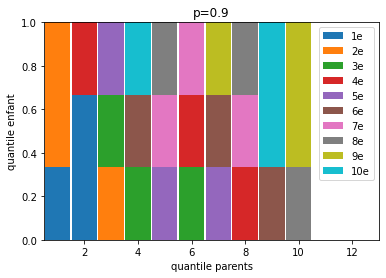

In [167]:
# Lire d'abord avec les couleurs. 
plot_conditional_distributions(0.9, cond_distrib, 10)

In [168]:
#202. 

# Fonction qui regroupe et automatise les fonctions précédentes. 


def create_conditional_distributions_matrice(pj, nb_quantiles):
    n  = 1000*nb_quantiles
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    return conditional_distributions(sample, nb_quantiles)

In [169]:
# 203.

# Transformer les proba. cond. de la matrice en # de familles concernées. 
# Ex: Si il y a 1000 familles par quantile et que la prob. cond de 2 (parents) sachant 3 (enfants) est de 25%. 
# Alors le nombre de familles concernées (ie: enfant 3 et parent 2) = 25% * 1000 = 250 familles. 

def get_values_from_frequencies(n, values, frequencies):
    nb_values = iteround.saferound(np.array(frequencies) * n, 0)
    nb_values = [int(x) for x in nb_values]
    return np.concatenate([ np.full(nb, value) for value, nb in zip(values, nb_values) ])


In [170]:
# 146.

pj = 0.9            
nb_quantiles = 10        
n  = 1000*nb_quantiles  

In [171]:
y_child, y_parents = generate_incomes(n, pj)

Pour chacun des $n$ individus générés, calculez la classe de revenu $c_{i,child}$ ainsi que la classe de revenu de ses parents $c_{i,parent}$ , à partir de $y_{child}$ et $y_{parent}$ .

In [172]:
sample = compute_quantiles(y_child, y_parents, nb_quantiles)

In [173]:
sample

,y_child,y_parents,c_i_child,c_i_parent
0,1.126273,2.944608,6,9
1,0.982429,0.649777,5,4
2,0.037128,0.125930,1,1
3,1.729897,0.759132,7,4
4,0.064908,0.091550,1,1
...,...,...,...,...
9995,39.557643,3.375925,10,9
9996,2.014076,0.487696,8,3
9997,1.090368,0.196208,6,1
9998,2.749354,1.188212,8,6


# Loi exponentielle:  
avec f(x) = y. 
alors il existe alpha tel que f(x + k) = alpha * y 
et f(x + k + k) = alpha * alpha * y 

C'est équivalent à: Quand on se déplace de k vers la droite sur l'axe des abscisses, on multiplie par alpha sur l'axe des ordonnées. 

Loi normale de paramètres (m, sigma):
- 64% entre [ m - sigma; m + sigma]

Exponentielle d'une loi normale: 
- (Vu que exponentielle est croissante), on a:  64% entre [exp(m-sigma); exp(m+sigma)]

Rev parents: Exp d'une loi normale de paramètres (0,1).
- 64% entre [exp( 0 - 1) ; exp( 0 + 1)] = [0.36, 2.72]
- 95% entre [exp(m-2sigma); exp(m+2sigma)] = [exp( 0 - 2) ; exp( 0 + 2)] = [0.13, 7.39]
    

In [174]:
np.exp(0-1)

0.36787944117144233

In [175]:
np.exp(0+1)

2.718281828459045

In [176]:
np.exp(0-2)

0.1353352832366127

In [177]:
np.exp(0+2)

7.38905609893065

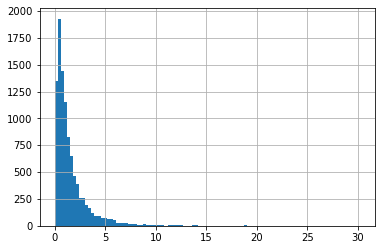

In [178]:
#204.
sample['y_parents'].hist(bins = 100)

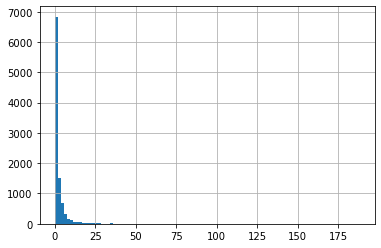

In [179]:
sample['y_child'].hist(bins = 100)

A partir de cette dernière information, estimez pour chaque $c_{i,child}$ la distribution conditionnelle de $c_{i,parent}$ . Par exemple, si vous observez 6 individus ayant à la fois $c_{i,child} = 5$ et $c_{i,parent} = 8$ , et que 200 individus sur 20000 ont $ c_{i,child} = 5$ , alors la probabilité d'avoir $ c_{i,parent} = 8$ sachant $c_{i,child} = 5$ et sachant $p_j=0.9$ sera estimée à 6/200 (On note cette probabilité comme ceci : $P(c_{i,parent}=8|c_{i,child}=5,p_j=0.9) = 0.03$ ). Si votre population est divisée en $c$ classes de revenu, vous devriez alors avoir $c^2$ estimations de ces probabilités conditionnelles, pour chaque pays.

In [180]:
cd = conditional_distributions(sample, nb_quantiles)

In [181]:
cd

[[0.447, 0.223, 0.136, 0.079, 0.065, 0.021, 0.014, 0.011, 0.003, 0.001],
 [0.233, 0.209, 0.152, 0.13, 0.107, 0.07, 0.055, 0.027, 0.014, 0.003],
 [0.129, 0.161, 0.149, 0.158, 0.123, 0.106, 0.071, 0.047, 0.043, 0.013],
 [0.084, 0.126, 0.171, 0.151, 0.129, 0.114, 0.099, 0.073, 0.032, 0.021],
 [0.055, 0.111, 0.111, 0.126, 0.127, 0.135, 0.103, 0.117, 0.085, 0.03],
 [0.026, 0.084, 0.105, 0.11, 0.121, 0.159, 0.126, 0.111, 0.112, 0.046],
 [0.012, 0.051, 0.078, 0.101, 0.116, 0.124, 0.161, 0.139, 0.129, 0.089],
 [0.011, 0.023, 0.06, 0.077, 0.1, 0.114, 0.151, 0.154, 0.176, 0.134],
 [0.002, 0.011, 0.02, 0.051, 0.063, 0.107, 0.141, 0.196, 0.194, 0.215],
 [0.001, 0.001, 0.018, 0.017, 0.049, 0.05, 0.079, 0.125, 0.212, 0.448]]

In [182]:
# 150

# | se lit "sachant que"

c_i_child = 5 
c_i_parent = 8

p = proba_cond(c_i_parent, c_i_child, cd) # assesseur. 
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.112


# Probabilités conditionnelles. 

- 1 pays. 1m habitants. 50% des habitants savent nager. Pour les Jeux Olympiques, 10 meilleurs nageurs séléctionnés (savent nager).

- P(Savoir nager) = 50%.
- P(Selectionné JO) = 10/1m = 0,001%. 
- P(Selectionné JO ET Savoir Nager) = 0,001%.
- P(Selectionné JO SACHANT QUE Savoir Nager) = #(Selectionné JO ET Savoir Nager) / #(Savoir Nager) = 10 / 500k = 0,002%
- P(Savoir Nager SACHANT QUE Selectionné JO) = #(Savoir Nager ET Selectionné JO) / #(Selectionnés JO) = 10 / 10 = 100%

Formules des probabilités conditionnelles: 
- P(A sachant B) = P( A ET B) / P(B)
- P(B sachant A) = P (B ET A ) / P(A) = P(A ET B) / P(A)



Optionnellement et pour vérifier la cohérence de votre code, vous pouvez créer un graphique représentant ces distributions conditionnelles. Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de $p_j$ : l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9) :

In [183]:
cd

[[0.447, 0.223, 0.136, 0.079, 0.065, 0.021, 0.014, 0.011, 0.003, 0.001],
 [0.233, 0.209, 0.152, 0.13, 0.107, 0.07, 0.055, 0.027, 0.014, 0.003],
 [0.129, 0.161, 0.149, 0.158, 0.123, 0.106, 0.071, 0.047, 0.043, 0.013],
 [0.084, 0.126, 0.171, 0.151, 0.129, 0.114, 0.099, 0.073, 0.032, 0.021],
 [0.055, 0.111, 0.111, 0.126, 0.127, 0.135, 0.103, 0.117, 0.085, 0.03],
 [0.026, 0.084, 0.105, 0.11, 0.121, 0.159, 0.126, 0.111, 0.112, 0.046],
 [0.012, 0.051, 0.078, 0.101, 0.116, 0.124, 0.161, 0.139, 0.129, 0.089],
 [0.011, 0.023, 0.06, 0.077, 0.1, 0.114, 0.151, 0.154, 0.176, 0.134],
 [0.002, 0.011, 0.02, 0.051, 0.063, 0.107, 0.141, 0.196, 0.194, 0.215],
 [0.001, 0.001, 0.018, 0.017, 0.049, 0.05, 0.079, 0.125, 0.212, 0.448]]

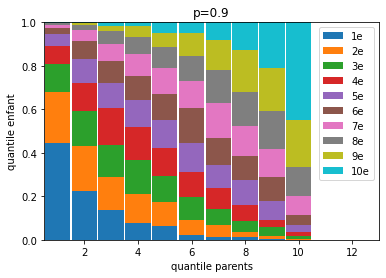

In [184]:
# 306. Si l'enfant appartient Q10: proba parent appartient Q10 = 40%.
# Se lit comme celui du haut. 

plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer (nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.

In [185]:

del y_parents, y_child

Nous allons maintenant travailler sur un nouvel échantillon. Celui-ci sera créé à partir de la WID. Pour chaque individu de la Wold Income Distribution, créez-en 499 "clones". La taille de votre nouvel échantillon sera donc 500 fois plus grand que celui de la Wold Income Distribution.

**Note** : *Les individus ici, sont des informations sur les parents / enfants*

In [214]:
# 307. 
# On reprends les fonctions d'avant. 
# Pour chaque pays: On récupère le taux elasticité et on fait une simulation: 100 quantiles (= centiles).
# 500 familles par quantiles. -> 500 * 100 = 50k famille par pays.

dist_inter_gen = distrib_revenus[['country', 'quantile', 'income']]
dist_inter_gen.columns = ['country', 'c_i_child', 'income_child']

dist_inter_gen = dist_inter_gen.append([dist_inter_gen]*499, ignore_index=True)


dist_inter_gen['c_i_parent'] = 0

In [215]:

dist_inter_gen['country'] = dist_inter_gen['country'].astype('category')
dist_inter_gen['c_i_child'] = dist_inter_gen['c_i_child'].astype('int8')
dist_inter_gen['c_i_parent'] = dist_inter_gen['c_i_parent'].astype('int8')

Pour chaque $c_{i,child}$ et chaque pays, il y a maintenant 500 individus. Vous attribuerez aux 500 individus leurs classes $ c_{i,parent}$ conformément aux distributions trouvées précédemment. <br> Par exemple, si $P(c_{i,parent}=8 | c_{i,child}=5,p_j=0.9) = 0.03$ , alors vous assignerez la classe $c_{i,parent} = 8$ à 15 des 500 individus du pays $ j$ ayant $c_{i,child}=5$ , car 500*0.03 = 15.
Nous allons, dans un premier temps, générer les distributions conditionnelles des classes de revenues pour chaque pays, en fonction de son coefficient d'elasticité
Le calcul des distributions conditionnelles étant long, il est possible de recharger la dernière calculée, qui a été stockée dans le le dossier variable_cache

In [216]:
calculer_distributions_conditionnelles = False

In [217]:


if calculer_distributions_conditionnelles:
    
    
    
    distributions_conditionnelles = {}
    start_time = time.time()
    for i, row in enumerate(coef_elasticite.iterrows()):
        iso3 = row[0]
        pj = row[1][0]

        clear_output(' ')
        print(f"""{time.time() - start_time:.2f}s - pays {i+1}/{len(coef_elasticite)}
            code iso : {iso3}, pj = {pj:.2f}
            calcul de la distribution conditionnelle...""")

        cd = create_conditional_distributions_matrice(pj, nb_quantiles=100)
        distributions_conditionnelles[iso3] = cd

        print(f"\t-- Calcule fait --")

    
    

    with open('distributions_conditionnelles.json', 'w') as fp:
        json.dump(distributions_conditionnelles, fp)
    print("\n-> fichier enregistré au format JSON")

In [218]:

if not calculer_distributions_conditionnelles:
    with open('distributions_conditionnelles.json', 'r') as fp:
        distributions_conditionnelles = json.load(fp)

In [219]:
# Fin calcul commencé 307. (Récupération JSON pour éviter faire calcul à chaque fois).

In [220]:
# 308. 

pays = 'FRA'
c_i_parent = 13
# sachant..
c_i_child = 85


pj = coef_elasticite.loc[pays, 'elasticite']
p = distributions_conditionnelles[pays][c_i_child][c_i_parent]


display(Math(f'P(c_{{i,parent}}={c_i_parent} | c_{{i,child}}={c_i_child},p_{{{pays.lower()}}}={pj:.2f}) = {p}'))

<IPython.core.display.Math object>

In [221]:
pays = 'FRA'
c_i_parent = 25
list_abs = []
list_val = []
for c_i_child in range(100):
    pj = coef_elasticite.loc[pays, 'elasticite']
    p = distributions_conditionnelles[pays][c_i_child][c_i_parent]
    display(Math(f'P(c_{{i,parent}}={c_i_parent} | c_{{i,child}}={c_i_child},p_{{{pays.lower()}}}={pj:.2f}) = {round(100 *p,1)}\%'))
    list_abs.append(c_i_child)
    list_val.append(100 * p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [222]:
pays = 'FRA'
c_i_parent = 75
list_abs_1 = []
list_val_1 = []
for c_i_child in range(100):
    pj = coef_elasticite.loc[pays, 'elasticite']
    p = distributions_conditionnelles[pays][c_i_child][c_i_parent]
    #display(Math(f'P(c_{{i,parent}}={c_i_parent} | c_{{i,child}}={c_i_child},p_{{{pays.lower()}}}={pj:.2f}) = {round(100 *p,1)}\%'))
    list_abs_1.append(c_i_child)
    list_val_1.append(100 * p)

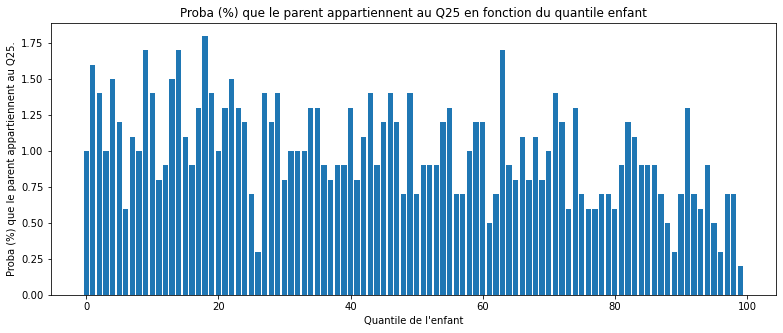

In [223]:
plt.figure(figsize=(13,5))
plt.bar(list_abs,list_val)
plt.ylabel('Proba (%) que le parent appartiennent au Q25.')
plt.xlabel("Quantile de l'enfant")
plt.title('Proba (%) que le parent appartiennent au Q25 en fonction du quantile enfant')
plt.show()

Text(0.5, 1.0, 'Proba (%) que le parent appartiennent au Q75 en fonction du quantile enfant')

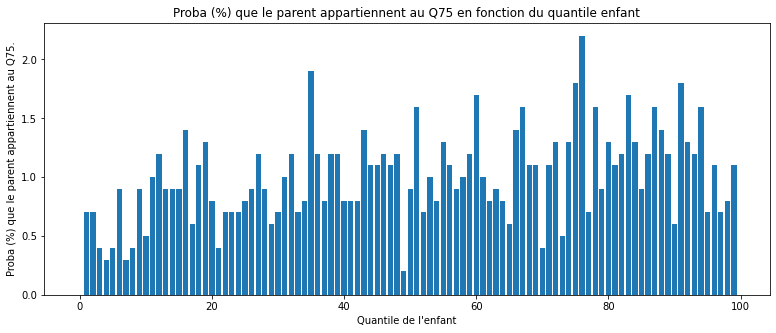

In [224]:
plt.figure(figsize=(13,5))
plt.bar(list_abs_1,list_val_1)
plt.ylabel('Proba (%) que le parent appartiennent au Q75.')
plt.xlabel("Quantile de l'enfant")
plt.title('Proba (%) que le parent appartiennent au Q75 en fonction du quantile enfant')

In [225]:
#on va génerer, pour chaque couple (country,c_i_child) (500 individus), la classe des parents.
#on optimise le DataFrame dist_inter_gen 

#on recherche les individus en fonction de leurs country et c_i_child.

In [226]:
# 310. dist_inter_gen: 1 ligne pour chaque famille -> 5,8m de lignes.
dist_inter_gen.set_index(['country', 'c_i_child'], inplace=True)
dist_inter_gen.sort_index(inplace=True)

dist_inter_gen.head(2)

income_child  c_i_parent
country c_i_child                          
ALB     1             728.89795           0
        1             728.89795           0

In [227]:
dist_inter_gen.loc['ALB'] 

,income_child,c_i_parent
c_i_child,,
1,728.89795,0
1,728.89795,0
1,728.89795,0
1,728.89795,0
1,728.89795,0
...,...,...
100,17754.32400,0
100,17754.32400,0
100,17754.32400,0


In [228]:
import iteround

In [229]:
calculer_c_i_parents = False

In [230]:

if calculer_c_i_parents:
    c_i_parents_values = np.arange(1,101, dtype='int8')
    c_i_child_values = np.arange(1,101, dtype='int8')

    start_time = time.time()

    
    for i, code_pays in enumerate(pays_refiso['iso3'].values):

        
        pj = coef_elasticite.loc[code_pays, 'elasticite']

        
        clear_output(' ')
        print(f"""{time.time() - start_time:.2f}s - pays {i+1}/{len(pays_refiso)}
            code iso : {code_pays}, pj = {pj:.2f}""")

       
        for c_i_child in c_i_child_values:

            
            dc = distributions_conditionnelles[code_pays][c_i_child-1]
            
            c_i_parents = get_values_from_frequencies(500, c_i_parents_values, frequencies = dc)

            
            dist_inter_gen.loc[(code_pays, c_i_child), 'c_i_parent'] = c_i_parents
            
    
    dist_inter_gen.to_csv('donnees/dist_inter_gen.csv')
    print("\n-> dist_inter_gen enregistré au format CSV")

In [231]:


dist_inter_gen = pd.read_csv('dist_inter_gen.csv')

In [232]:
dist_inter_gen[dist_inter_gen.country == 'ALB'].sample(10) # 10 familles au hasard parmis les 50k ALBANIE.

,country,c_i_child,income_child,c_i_parent
1456,ALB,3,1010.9160,41
30096,ALB,61,2853.7224,31
46961,ALB,94,5619.4450,99
26840,ALB,54,2624.4960,67
40176,ALB,81,3894.5598,61
43781,ALB,88,4587.1970,81
43331,ALB,87,4477.9634,87
43317,ALB,87,4477.9634,86
18082,ALB,37,2115.2470,16
10918,ALB,22,1746.3910,59


In [233]:
dist_inter_gen.sample(10) # 10 familles au hasard parmis les 5,8 Monde

,country,c_i_child,income_child,c_i_parent
2142942,HRV,86,11181.40300,94
2754059,KEN,9,208.55997,4
289967,BEL,80,19196.42800,94
3142816,LTU,86,10014.98200,79
3398675,MDG,98,1254.44820,79
2859416,KHM,19,789.27795,68
5591680,VEN,84,4835.13500,57
3839241,MYS,79,7995.27600,64
1065736,COL,32,1194.79210,35
1764997,GBR,30,13427.71000,98


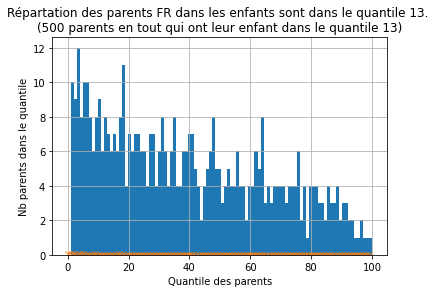

In [234]:
#210 

pays = 'FRA'
c_i_child = 13


a=plt.hist(
    dist_inter_gen.loc[(dist_inter_gen['country'] == pays) & (dist_inter_gen['c_i_child'] == c_i_child), 'c_i_parent'],
    density=False, bins=100
)
plt.title('Répartation des parents FR dans les enfants sont dans le quantile 13. \n(500 parents en tout qui ont leur enfant dans le quantile 13)')
plt.ylabel('Nb parents dans le quantile')
plt.xlabel('Quantile des parents')
plt.plot(distributions_conditionnelles[pays][c_i_child-1], 'x')
plt.grid()
plt.show()

Éventuellement et pour éviter toute confusion, effacez la variable $c_{i,child}$ : nous n'en avons pas besoin pour la mission 4.

In [235]:
dist_inter_gen.drop('c_i_child', axis=1, inplace=True)

Assurez-vous que votre nouvel échantillon contiennent bien les variables initialement présentes dans la World income distribution : $ m_j $ et $ G_j $ . <br> <br> **NOTE** : $m_j$ est le salaire moyen et $G_j$ est l'indice de Gini

In [236]:
dist_inter_gen = dist_inter_gen.merge(gdp_ppp, how='left', left_on='country', right_index=True)
dist_inter_gen = dist_inter_gen.merge(indice_gini_ref, how='left', left_on='country', right_index=True)

In [237]:
dist_inter_gen.sample(5)

,country,income_child,c_i_parent,gdpppp,gini_ref
3158425,LUX,13610.50400,74,73127.0,31.607692
3403219,MEX,558.75104,18,13434.0,47.938462
483234,BIH,6692.24270,59,7472.0,32.560000
5434008,UKR,3708.98120,6,6721.0,28.088889
961612,CMR,828.07730,15,2007.0,43.975000


# Mission4

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle

In [238]:
dist_inter_gen.sample(3)

,country,income_child,c_i_parent,gdpppp,gini_ref
5666590,XKX,1464.66560,17,3255.0,29.240000
2445388,IRQ,2922.79760,91,3171.0,29.050000
4984994,SWZ,552.93005,99,4748.0,55.033333


In [239]:
dist_inter_gen[dist_inter_gen['country'] == 'ALB'].shape

(50000, 5)

In [240]:
dist_inter_gen[dist_inter_gen['country'] == 'ALB'].head()

,country,income_child,c_i_parent,gdpppp,gini_ref
0,ALB,728.89795,1,7297.0,29.66
1,ALB,728.89795,1,7297.0,29.66
2,ALB,728.89795,1,7297.0,29.66
3,ALB,728.89795,1,7297.0,29.66
4,ALB,728.89795,1,7297.0,29.66


In [241]:
dist_inter_gen[dist_inter_gen['country'] == 'ALB']['income_child'].mean()

2994.829902

Text(0, 0.5, 'revenu moyen des enfants')

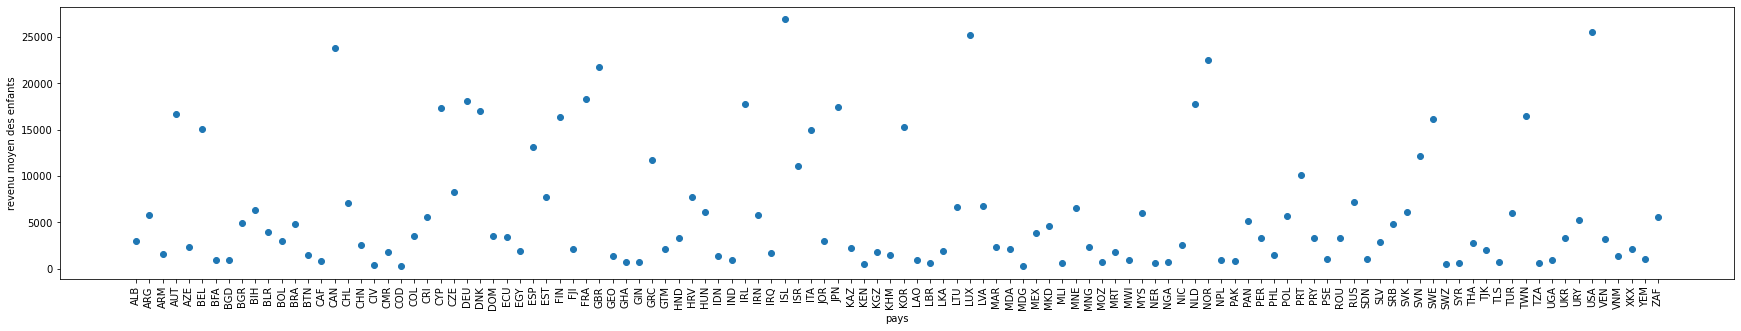

In [242]:
plt.figure(figsize=(30,5))
rs = plt.plot(dist_inter_gen.groupby('country').income_child.mean(), 'o')
rs = plt.xticks(rotation=90)
plt.xlabel('pays')
plt.ylabel('revenu moyen des enfants')

In [243]:
5800000 / 50000 # 5.8m lignes en tout. 50k lignes par pays.

116.0

In [244]:
nb_ind_pays = 500 # On selectionne au 5k individus par pays (au lieu de 50k).
dist_inter_gen_sample = (dist_inter_gen.groupby('country')
                            .apply(lambda pop_pays: pop_pays.sample(nb_ind_pays))
                            .reset_index(drop=True)) 

In [245]:
dist_inter_gen_sample.shape

(58000, 5)

In [ ]:
Anova

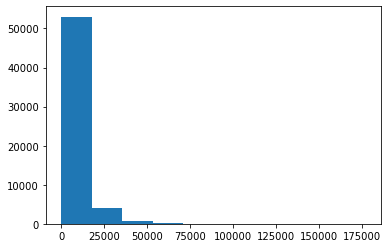

Statistics=57198.005, p=0.000
L’échantillon ne semble pas gaussien (rejeter H0)


In [365]:
data22 = dist_inter_gen_sample
data22

plt.hist(data22['income_child'])
plt.show()

# test de normalité
stat, p = stats.normaltest(data22['income_child'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
    
    print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
    print('L’échantillon ne semble pas gaussien (rejeter H0)')


Modified Dataframe : 
  country  income_child  c_i_parent   gdpppp   gini_ref
0     BIH   6226.515707      52.184   7472.0  32.560000
1     LUX  25120.851487      50.844  73127.0  31.607692
2     PHL   1354.384084      49.088   3240.0  41.866667


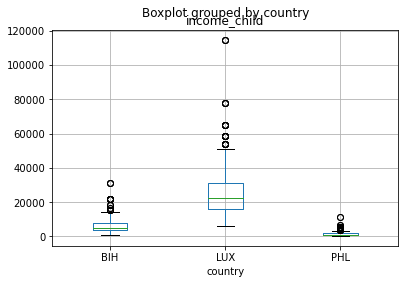

In [366]:
lux= data22.loc[data22['country']== 'LUX']
bih= data22.loc[data22['country']== 'BIH']
phl= data22.loc[data22['country']== 'PHL']

df_groupes = pd.concat([lux,bih,phl])
df_groupes

df_groupes.boxplot('income_child', by='country')

df_groupes.groupby('country').mean()

group2 = df_groupes.groupby('country').mean()
group2

modified = group2.reset_index()
print("Modified Dataframe : ")
print(modified)


In [367]:
# Calcul ANOVA
anova = pg.anova(dv='income_child', between='country', data=df_groupes)
# Print  ANOVA 
pg.print_table(anova)


ANOVA SUMMARY

Source      ddof1    ddof2         F    p-unc    np2
--------  -------  -------  --------  -------  -----
country         2     1497  1003.936    0.000  0.573



ANOVA basée uniquement sur la variable qualitative pays.
la variation de revenus entre les personnes expliquée par + 50% par leurs pays d'origine.




Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?

In [249]:
#220

reg1_X = dist_inter_gen_sample[['gdpppp', 'gini_ref']]
reg1_X = sm.add_constant(reg1_X)
reg1_y = dist_inter_gen_sample['income_child']

c:\users\philippe\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [250]:

reg1_lin_mod = sm.OLS(reg1_y, reg1_X)
reg1_lin_res = reg1_lin_mod.fit()

In [251]:

reg1_lin_residual = (pd.concat([
                reg1_lin_res.resid,
                reg1_lin_res.fittedvalues
            ], axis=1)
     .drop_duplicates())

reg1_lin_residual.columns = ['residual', 'val_pred']

In [252]:
dist_inter_gen.head()

,country,income_child,c_i_parent,gdpppp,gini_ref
0,ALB,728.89795,1,7297.0,29.66
1,ALB,728.89795,1,7297.0,29.66
2,ALB,728.89795,1,7297.0,29.66
3,ALB,728.89795,1,7297.0,29.66
4,ALB,728.89795,1,7297.0,29.66


In [253]:
4357 - 3627

730

In [254]:
#222
reg1_lin_residual.head(3)

,residual,val_pred
0,97.914483,4319.996117
1,-231.509117,4319.996117
2,1299.448883,4319.996117


In [255]:
dist_inter_gen.iloc[[0,500,1000]]

,country,income_child,c_i_parent,gdpppp,gini_ref
0,ALB,728.89795,1,7297.0,29.66
500,ALB,916.66235,1,7297.0,29.66
1000,ALB,1010.91600,1,7297.0,29.66


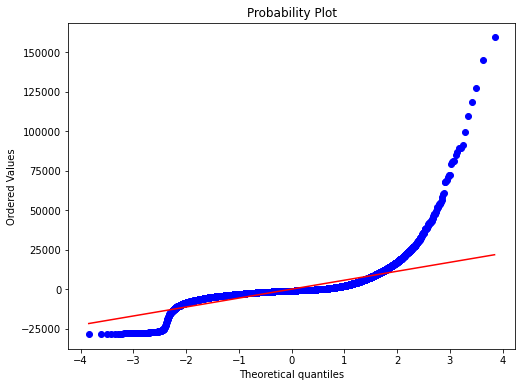

In [256]:

fig, ax = plt.subplots(figsize=(8,6))
_ = st.probplot(reg1_lin_residual['residual'], plot=ax, fit=True)

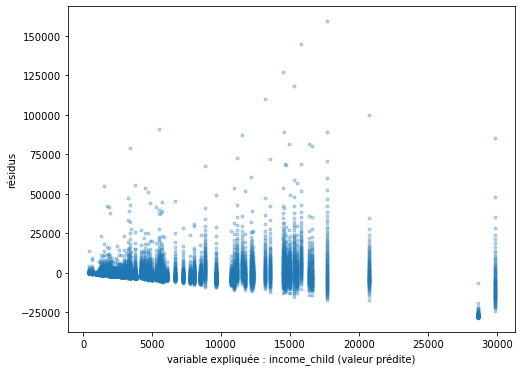

In [257]:

fig = plt.figure(figsize=(8,6))
plt.plot(reg1_lin_residual['val_pred'], reg1_lin_residual['residual'], '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child (valeur prédite)')
_ = plt.ylabel('résidus')

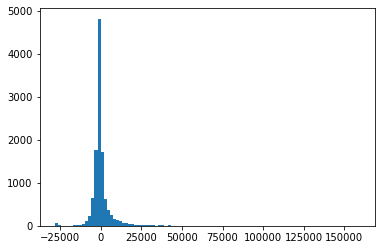

In [258]:
plt.figure()
plt.hist(reg1_lin_residual['residual'],bins = 100)
plt.show()

Les résidus ne suivent pas une loi normale et la variance des résidus n'est pas constante.

La relation n'est pas linéaire, la régression linéaire n'est donc pas un bon modèle.

les variables de revenus ont une tendance exponentiel (selon les courbes de Lorenz), on va les mettre au logarithme.



In [259]:
np.log(30000)

10.308952660644293

In [260]:

reg1_log_X = reg1_X.copy()
reg1_log_X['gdpppp'] = np.log(reg1_log_X['gdpppp'])


reg1_log_y = reg1_y.copy()
reg1_log_y = np.log(reg1_log_y)

In [261]:
reg1_log_X.iloc[[0,500,1000]]

,const,gdpppp,gini_ref
0,1.0,8.895219,29.660000
500,1.0,9.489486,46.930435
1000,1.0,8.632484,32.156250


In [262]:
reg1_log_y.iloc[[0,500,1000]]

0       8.393422
500     8.604928
1000    6.985708
Name: income_child, dtype: float64

In [263]:

reg1_log_mod = sm.OLS(reg1_log_y, reg1_log_X)
reg1_log_res = reg1_log_mod.fit()

On va faire un test de type F-ratio

In [264]:
reg1_log_fval = reg1_log_res.fvalue
reg1_log_f_pval = reg1_log_res.f_pvalue

In [265]:
display(Markdown(
f"""
la statistique de test **F vaut {reg1_log_fval:.0f}** (*p-valeur = {reg1_log_f_pval:.2f}*)
"""))


la statistique de test **F vaut 48252** (*p-valeur = 0.00*)


Analyse des résidus

In [266]:

reg1_log_residual = (pd.concat([
                reg1_log_res.resid,
                reg1_log_res.fittedvalues
            ], axis=1)
     .drop_duplicates())

reg1_log_residual.columns = ['residual', 'val_pred']

In [267]:
reg1_log_residual.head(3)

,residual,val_pred
0,0.328465,8.064957
1,0.250973,8.064957
2,0.569031,8.064957


Normalité de leur distribution

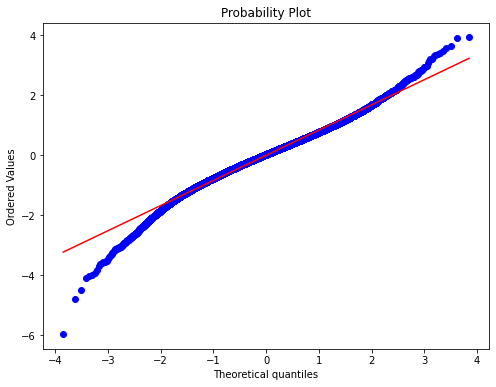

In [268]:
fig, ax = plt.subplots(figsize=(8,6))
_ = st.probplot(reg1_log_residual['residual'], plot=ax, fit=True)

Égalité de leur variance

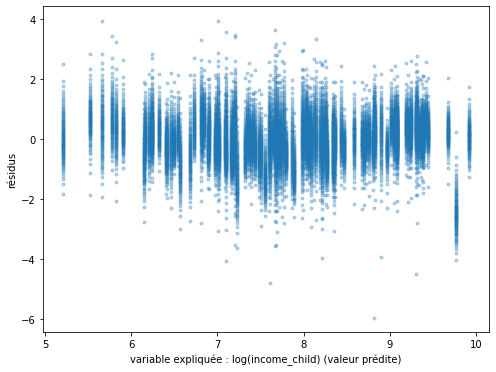

In [269]:

fig = plt.figure(figsize=(8,6))
plt.plot(reg1_log_residual['val_pred'], reg1_log_residual['residual'], '.', alpha=0.3)
plt.xlabel('variable expliquée : log(income_child) (valeur prédite)')
_ = plt.ylabel('résidus')

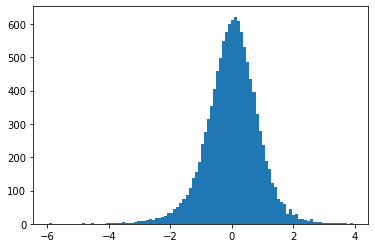

In [270]:
plt.figure()
plt.hist(reg1_log_residual['residual'],bins = 100)
plt.show()

les résidus semblent suivre une loi normale et leur variance est constante.

La mise au logarithme a donc bien donnée une tendance linéaire aux données.


In [271]:
reg1_log_vif = pd.DataFrame()
reg1_log_vif["VIF Factor"] = [variance_inflation_factor(reg1_log_X.values, i) for i in range(reg1_log_X.shape[1])]
reg1_log_vif["features"] = reg1_log_X.columns

In [272]:

reg1_log_vif

,VIF Factor,features
0,103.594145,const
1,1.114689,gdpppp
2,1.114689,gini_ref


In [273]:
reg1_log_cooks_dist,_  = reg1_log_res.get_influence().cooks_distance

In [274]:

n, p = reg1_log_X.shape
reg1_log_cooks_seuil = 4 / (n-p)

reg1_log_nb_outlier = np.sum(reg1_log_cooks_dist > reg1_log_cooks_seuil)

In [275]:
display(Markdown(
f"""
On considère que les individus ayant une **distance de Cooks > à {reg1_log_cooks_seuil:.1e}** sont des outliers influents.

On en compte **{reg1_log_nb_outlier}**, soit **{reg1_log_nb_outlier / n * 100:.1f}%**.
"""))


On considère que les individus ayant une **distance de Cooks > à 6.9e-05** sont des outliers influents.

On en compte **3404**, soit **5.9%**.


Selon ce modèle, donnez la décomposition de variance totale expliquée par :
- Le pays de naissance (ie. le revenu moyen et l’indice de Gini)
- Les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

In [276]:
reg1_log_sct = reg1_log_res.centered_tss
reg1_log_sce = reg1_log_res.ess
reg1_log_scr = reg1_log_res.ssr
reg1_log_r2 = reg1_log_res.rsquared

In [277]:
display(Markdown(f"""
La décomposition de la variance de notre modèle est : <br>

**SCT = SCE + SCR**
- SCT = {reg1_log_sct:.0f} <br>
- SCE = {reg1_log_sce:.0f} <br>
- SCR = {reg1_log_scr:.0f} <br>

Ce qui donne une valeur $R^2 = {reg1_log_r2:.2f}$

Notre modèle explique donc **{reg1_log_r2*100:.0f}% de la variance totale**.
"""))


La décomposition de la variance de notre modèle est : <br>

**SCT = SCE + SCR**
- SCT = 110591 <br>
- SCE = 69077 <br>
- SCR = 41514 <br>

Ce qui donne une valeur $R^2 = 0.62$

Notre modèle explique donc **62% de la variance totale**.


Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?

In [278]:

reg2_X = dist_inter_gen_sample[['gdpppp', 'gini_ref', 'c_i_parent']]
reg2_X = sm.add_constant(reg2_X)
reg2_y = dist_inter_gen_sample['income_child']

c:\users\philippe\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [279]:

reg2_lin_mod = sm.OLS(reg2_y, reg2_X)
reg2_lin_res = reg2_lin_mod.fit()

In [280]:

reg2_lin_residual = (pd.concat([
                reg2_lin_res.resid,
                reg2_lin_res.fittedvalues
            ], axis=1)
     .drop_duplicates()
     .sample(5000))

reg2_lin_residual.columns = ['residual', 'val_pred']

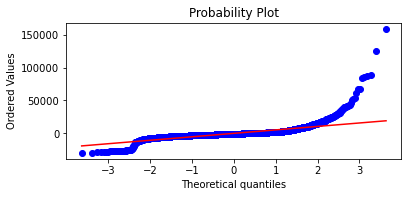

In [281]:

fig, ax = plt.subplots(figsize=(6,2.5))
_ = st.probplot(reg2_lin_residual['residual'], plot=ax, fit=True)

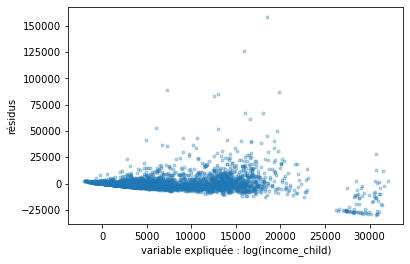

In [282]:

plt.plot(reg2_lin_residual['val_pred'], reg2_lin_residual['residual'], '.', alpha=0.3)
plt.xlabel('variable expliquée : log(income_child)')
_ = plt.ylabel('résidus')

In [283]:

reg2_log_X = reg2_X.copy()
reg2_log_X['gdpppp'] = np.log(reg2_log_X['gdpppp'])
reg2_log_X['c_i_parent'] = np.log(reg2_log_X['c_i_parent'])


reg2_log_y = reg2_y.copy()
reg2_log_y = np.log(reg2_log_y)

In [284]:

reg2_log_mod = sm.OLS(reg2_log_y, reg2_log_X)
reg2_log_res = reg2_log_mod.fit()

In [285]:
reg2_log_fval = reg2_log_res.fvalue
reg2_log_f_pval = reg2_log_res.f_pvalue

In [286]:
display(Markdown(
f"""
la statistique de test **F vaut {reg2_log_fval:.0f}** (*p-valeur = {reg2_log_f_pval:.2f}*)
"""))


la statistique de test **F vaut 39281** (*p-valeur = 0.00*)


In [287]:

reg2_log_residual = (pd.concat([
                reg2_log_res.resid,
                reg2_log_res.fittedvalues
            ], axis=1)
     .drop_duplicates()
     .sample(5000))

reg2_log_residual.columns = ['residual', 'val_pred']

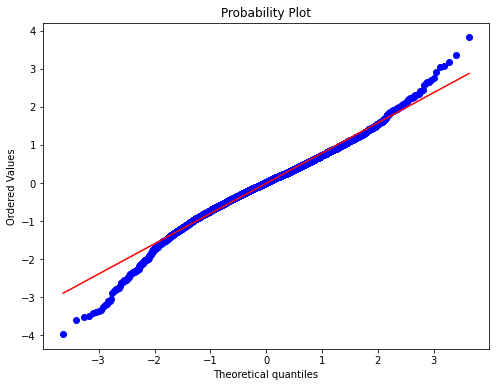

In [288]:
fig, ax = plt.subplots(figsize=(8,6))
_ = st.probplot(reg2_log_residual['residual'], plot=ax, fit=True)

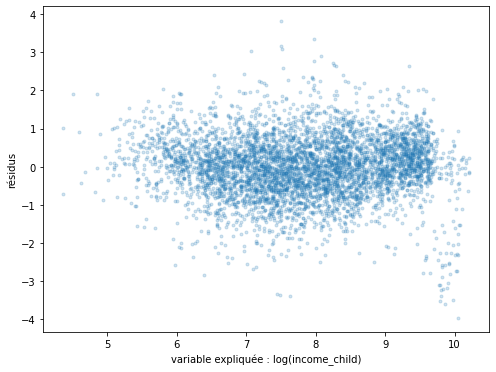

In [289]:

plt.figure(figsize=(8,6))
plt.plot(reg2_log_residual['val_pred'], reg2_log_residual['residual'], '.', alpha=0.2)
plt.xlabel('variable expliquée : log(income_child)')
_ = plt.ylabel('résidus')

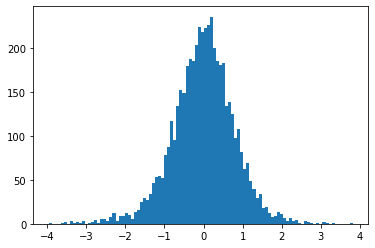

In [290]:
plt.figure()
plt.hist(reg2_log_residual['residual'],bins = 100)
plt.show()

In [291]:
reg2_log_vif = pd.DataFrame()
reg2_log_vif["VIF Factor"] = [variance_inflation_factor(reg2_log_X.values, i) for i in range(reg2_log_X.shape[1])]
reg2_log_vif["features"] = reg2_log_X.columns

In [292]:
reg2_log_vif

,VIF Factor,features
0,118.769941,const
1,1.114714,gdpppp
2,1.114692,gini_ref
3,1.000022,c_i_parent


In [293]:

reg2_log_cooks_dist,_  = reg2_log_res.get_influence().cooks_distance


n, p = reg2_log_X.shape
reg2_log_cooks_seuil = 4 / (n-p)


reg2_log_nb_outlier = np.sum(reg2_log_cooks_dist > reg2_log_cooks_seuil)

In [294]:

display(Markdown(
f"""
On considère que les individus ayant une **distance de Cooks > à {reg2_log_cooks_seuil:.1e}** sont des outliers influents.

On en compte **{reg2_log_nb_outlier}**, soit **{reg2_log_nb_outlier / n * 100:.1f}%**.
"""))


On considère que les individus ayant une **distance de Cooks > à 6.9e-05** sont des outliers influents.

On en compte **3535**, soit **6.1%**.


In [295]:

gini_a = 0
gini_b = 100


log_gdpppp_c = 7
log_c_i_parent_c = 2


log_y_a = reg2_log_res.predict([1.0, log_gdpppp_c, gini_a, log_c_i_parent_c])[0]
log_y_b = reg2_log_res.predict([1.0, log_gdpppp_c, gini_b, log_c_i_parent_c])[0]

y_a, y_b = np.exp(log_y_a), np.exp(log_y_b)


display(Markdown(
f"""
$y_{{gini={gini_a}}} = {y_a:.0f}$ <br>
$y_{{gini={gini_b}}} = {y_b:.0f}$ <br>

$ y_{{gini={gini_a}}} / y_{{gini={gini_b}}} = {{{y_a/y_b:.4f}}}$
"""))


$y_{gini=0} = 709$ <br>
$y_{gini=100} = 102$ <br>

$ y_{gini=0} / y_{gini=100} = {6.9463}$


Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :
Le pays de naissance et le revenu des parents
Les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

In [296]:
reg2_log_sct = reg2_log_res.centered_tss
reg2_log_sce = reg2_log_res.ess
reg2_log_scr = reg2_log_res.ssr
reg2_log_r2 = reg2_log_res.rsquared

In [297]:
display(Markdown(f"""
La décomposition de la variance de notre modèle est : <br>

**SCT = SCE + SCR**
- SCT = {reg2_log_sct:.0f} <br>
- SCE = {reg2_log_sce:.0f} <br>
- SCR = {reg2_log_scr:.0f} <br>

Ce qui donne une valeur $R^2 = {reg2_log_r2:.2f}$

Notre modèle explique donc **{reg2_log_r2*100:.0f}% de la variance totale**.
"""))


La décomposition de la variance de notre modèle est : <br>

**SCT = SCE + SCR**
- SCT = 110591 <br>
- SCE = 74115 <br>
- SCR = 36475 <br>

Ce qui donne une valeur $R^2 = 0.67$

Notre modèle explique donc **67% de la variance totale**.


In [298]:

c_i_parent_ind = 77
pays = 'FRA'

gdpppp_ind = gdp_ppp.loc[pays][0]
indice_gini_ind = indice_gini_ref.loc[pays][0]

log_gdpppp_ind = np.log(gdpppp_ind)
log_indice_gini_ind = np.log(indice_gini_ind)
log_c_i_parent_ind = np.log(c_i_parent_ind)


income_child = np.exp(reg2_log_res.predict([1.0, log_gdpppp_ind, log_indice_gini_ind, log_c_i_parent_ind])[0])


c_i_parent_ind_income = distrib_revenus.loc[(distrib_revenus['country'] == pays) & (distrib_revenus['quantile'] == 77), 'income'].values[0]

display(Markdown(
f"""
Soit un parent de centile de revenu **{c_i_parent_ind}** *(en moyenne {c_i_parent_ind_income})* et d'un pays dont
- le pouvoir d'achat GDP PPP = **{gdpppp_ind}**
- l'indice de Gini vaut **{indice_gini_ind:.2f}**

Alors notre modèle prédit que l'enfant gagnera **{income_child:.2f}**
"""))


Soit un parent de centile de revenu **77** *(en moyenne 22165.895)* et d'un pays dont
- le pouvoir d'achat GDP PPP = **30357.0**
- l'indice de Gini vaut **32.09**

Alors notre modèle prédit que l'enfant gagnera **21315.84**
